In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(r'E:\DATAANALYTICSPROJECTS\StudentsPerformance.csv')
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,standard,none,72,72,74
1,female,some college,standard,completed,69,90,88
2,female,master's degree,standard,none,90,95,93
3,male,associate's degree,free/reduced,none,47,57,44
4,male,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 7)

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head(10)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,bachelor's degree,standard,none,72,72,74,73.0
1,female,some college,standard,completed,69,90,88,82.0
2,female,master's degree,standard,none,90,95,93,93.0
3,male,associate's degree,free/reduced,none,47,57,44,49.0
4,male,some college,standard,none,76,78,75,76.0
5,female,associate's degree,standard,none,71,83,78,77.0
6,female,some college,standard,completed,88,95,92,92.0
7,male,some college,free/reduced,none,40,43,39,41.0
8,male,high school,free/reduced,completed,64,64,67,65.0
9,female,high school,free/reduced,none,38,60,50,49.0


In [13]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# label encoding 

In [23]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])
df.head(10)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,72,72,74,73.0
1,0,4,1,0,69,90,88,82.0
2,0,3,1,1,90,95,93,93.0
3,1,0,0,1,47,57,44,49.0
4,1,4,1,1,76,78,75,76.0
5,0,0,1,1,71,83,78,77.0
6,0,4,1,0,88,95,92,92.0
7,1,4,0,1,40,43,39,41.0
8,1,2,0,0,64,64,67,65.0
9,0,2,0,1,38,60,50,49.0


# Analyzing Test Preparation Count 

In [28]:
df['test preparation course'].value_counts()  
# 0 = female
# 1 = male

1    642
0    358
Name: test preparation course, dtype: int64

#pie plot of test preparation

([<matplotlib.patches.Wedge at 0x242aa15c3d0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

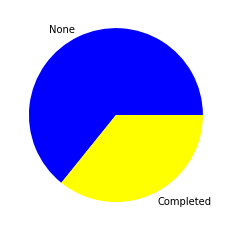

In [26]:
labels = ['None', 'Completed']   
colors = ['blue', 'yellow']
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = colors)

 #bar plot of test preparation

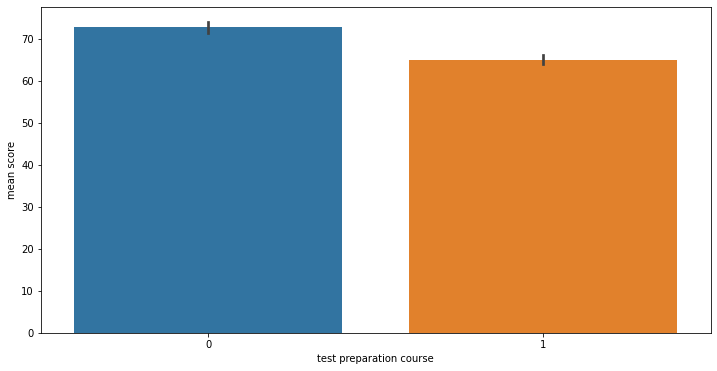

In [30]:
plt.figure(figsize = (12,6))    
sns.barplot(x = 'test preparation course', y = 'mean score', data = df)
plt.show()

#0 = completed
#1 = none

#The students who have completed Preparation Course are scoring good scores

# Analyzing parental level of Education

<AxesSubplot:xlabel='parental level of education', ylabel='mean score'>

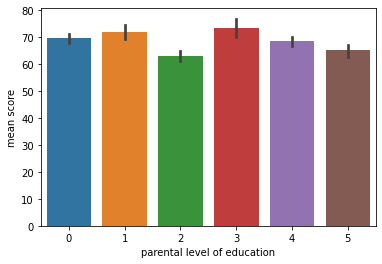

In [29]:
sns.barplot(x = 'parental level of education', y = 'mean score', data = df)

#2nd Category of Parental Education belongs to High School 
#and 3rd Category belongs to Master Degree 
therefore Parents Education is directly proportional to Students Marks

# Analyzing lunch

<AxesSubplot:xlabel='lunch', ylabel='mean score'>

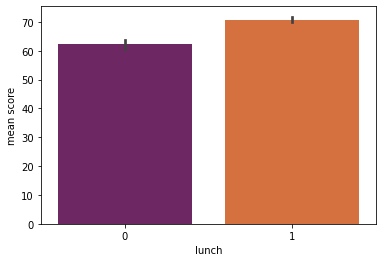

In [34]:
sns.barplot(x = df['lunch'], y = df['mean score'], palette = 'inferno')
#1 = Standard lunch
#0 = free/reduced lunch

The students who get standard lunch are performing better in exams than the students with free/reduced lunch

# Data Processing

In [35]:
df = df.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()

,gender,parental level of education,lunch,test preparation course,mean score
0,0,1,1,1,73.0
1,0,4,1,0,82.0
2,0,3,1,1,93.0
3,1,0,0,1,49.0
4,1,4,1,1,76.0


In [36]:
from sklearn.model_selection import train_test_split
y = df['mean score']
x = df.drop(['mean score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)


# Model Building

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [39]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [44]:
predictions = model.predict(x_test)
difference = abs(predictions - y_test)
difference.mean()

11.445